In [34]:
import pandas as pd
import numpy as np

In [35]:
stations = ['jfk', 'lga', 'nyc']
columns = ['station', 'model', 'runtime', 'ftime', 'n_x', 'tmp', 'dpt', 'cld',
           'wdr', 'wsp', 'p06', 'p12', 'q06', 'q12', 't06', 't12', 'snw', 'cig',
           'vis', 'obv', 'poz', 'pos', 'typ']
# quant columns come from https://mesonet.agron.iastate.edu/mos/fe.phtml
#http://www.nws.noaa.gov/mdl/synop/mavcard.php
float_cols =['n_x', 'tmp', 'dpt', 'wdr', 'wsp', 'p06', 'p12', 'q06', 'q12', 'poz', 'pos']
cat_cols = ['cld', 'snw', 'cig', 'vis', 'obv']
fraction_cols = ['t06', 't12']
quant_cols = float_cols + fraction_cols
codes = {'cld':{'CL':0, 'FW':1, 'SC':2, 'BK':3, 'OV':4}, 
         'obv':{'N':0, 'HZ':1, 'BR':2, 'FG':3, 'BL':4},
         'snw':{'0':0,'1':1,'2':2,'4':3,'6':4,'8':5},
         'vis':{'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7},
         'cig':{'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8}}

In [36]:
ls "../../CSV_Data/"

mos_jfk.csv  mos_lga.csv  mos_nyc.csv  obs_nyc.csv


In [37]:
mos = dict()
for station in stations:
    mos[station] = pd.read_csv(f'../../CSV_Data/mos_{station}.csv', names=columns, low_memory=False)
    mos[station].drop(0, axis=0, inplace=True)
    mos[station][float_cols] = mos[station][float_cols].astype(float)
    mos[station]['date'] = pd.to_datetime(mos[station]['runtime'])
    mos[station].set_index('date', inplace=True)

In [38]:
obs_df = pd.read_csv("../../CSV_Data/obs_nyc.csv")

In [39]:
obs = dict()

for nm, (st, df) in zip(stations, obs_df.groupby('NAME')):
    obs[nm] = df.copy()
    obs[nm]['date'] = pd.to_datetime(obs[nm]['DATE'])
    obs[nm].set_index('date', inplace=True)
    

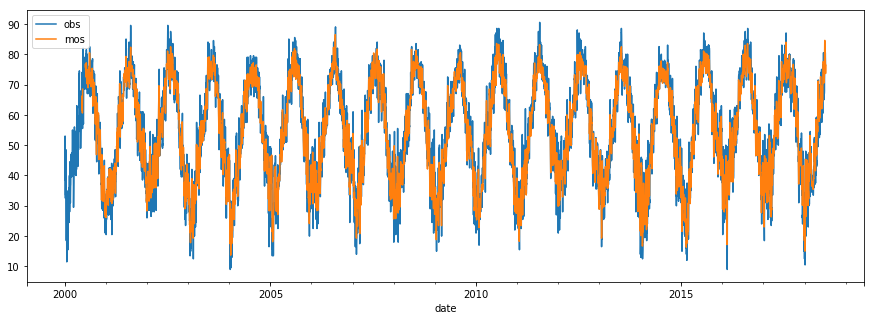

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,5))
_ = obs['jfk'][['TMAX','TMIN']].mean(axis=1).plot(ax=ax, label='obs')
_ = mos['jfk']['tmp'].resample('d').mean().plot(ax=ax, label="mos")
_ = ax.legend()
#user created observation over the mos mean for temperature at jfk station
#the mos usually underestimates how hot or how cold the temp would be 

In [8]:
mos['jfk']['tmp'].resample?

Object `resample` not found.


In [ ]:
mos['jfk']['tmp'].resample

In [9]:
mos['jfk']['tmp'].resample

<bound method NDFrame.resample of date
2000-05-30 12:00:00    61.0
2000-05-30 12:00:00    61.0
2000-05-30 12:00:00    56.0
2000-05-30 12:00:00    54.0
2000-05-30 12:00:00    53.0
2000-05-30 12:00:00    52.0
2000-05-30 12:00:00    57.0
2000-05-30 12:00:00    64.0
2000-05-30 12:00:00    67.0
2000-05-30 12:00:00    64.0
2000-05-30 12:00:00    59.0
2000-05-30 12:00:00    60.0
2000-05-30 12:00:00    61.0
2000-05-30 12:00:00    60.0
2000-05-30 12:00:00    63.0
2000-05-30 12:00:00    67.0
2000-05-30 12:00:00    70.0
2000-05-30 12:00:00    69.0
2000-05-30 12:00:00    66.0
2000-05-30 12:00:00    64.0
2000-05-30 12:00:00    68.0
2000-05-31 00:00:00    51.0
2000-05-31 00:00:00    50.0
2000-05-31 00:00:00    56.0
2000-05-31 00:00:00    64.0
2000-05-31 00:00:00    68.0
2000-05-31 00:00:00    65.0
2000-05-31 00:00:00    60.0
2000-05-31 00:00:00    60.0
2000-05-31 00:00:00    60.0
                       ... 
2018-07-08 18:00:00    76.0
2018-07-08 18:00:00    82.0
2018-07-08 18:00:00    86.0
2018-07-0

In [10]:
mos['jfk']['tmp'].resample('d').mean()

date
2000-05-30    61.714286
2000-05-31    66.119048
2000-06-01          NaN
2000-06-02          NaN
2000-06-03    63.571429
2000-06-04    61.642857
2000-06-05    60.595238
2000-06-06    65.119048
2000-06-07    68.452381
2000-06-08          NaN
2000-06-09          NaN
2000-06-10          NaN
2000-06-11          NaN
2000-06-12          NaN
2000-06-13          NaN
2000-06-14          NaN
2000-06-15          NaN
2000-06-16          NaN
2000-06-17          NaN
2000-06-18          NaN
2000-06-19          NaN
2000-06-20          NaN
2000-06-21          NaN
2000-06-22          NaN
2000-06-23          NaN
2000-06-24          NaN
2000-06-25          NaN
2000-06-26          NaN
2000-06-27          NaN
2000-06-28          NaN
                ...    
2018-06-10    64.392857
2018-06-11    66.511905
2018-06-12    69.202381
2018-06-13    70.630952
2018-06-14    72.369048
2018-06-15    73.285714
2018-06-16    75.785714
2018-06-17    77.571429
2018-06-18    76.400000
2018-06-19    74.869048
2018-06-20 

In [11]:
mos['jfk']['tmp']['2000-05-30'].mean()

61.714285714285715

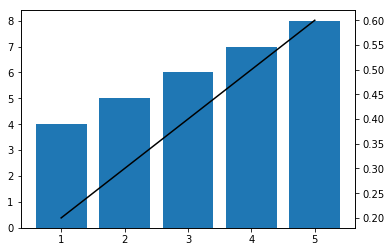

In [73]:


x =[1,2,3,4,5]
y =[4,5,6,7,8]
z = [.2,.3,.4,.5,.6]

fig, ax = plt.subplots()
ax.bar(x, y)
ax2 =ax.twinx()
ax2.plot(x,z, color='k')

In [74]:
ax.bar?